In [23]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

In [7]:
data= pd.read_excel('..\\data\\data_all.xlsx')

In [8]:
data2 = pd.read_excel('data_yellow.xlsx')

In [9]:
pids = data['Patient ID'].unique()

In [10]:
data2

,Patient ID,Age,Sex,Height (in),Height (cm),Weight (Ib),Weight (kg),Time (min),VO2/kg STPD (ml/kg/m),VO2 STPD (L/min),...,VCO2 STPD (L/min),(ml/min).1,VE STPD (L/min),RQ,RR (BPM),VE/VO2 (BT/ST),METS,TM SPD(mph),Start,End
0,1,46,F,67.000000,170.179993,186.380997,84.718636,10:00,3.240702,0.274548,...,0.187871,187.870577,5.767894,0.684291,9.828010,26.038467,0.925915,0.0,40,58
1,1,46,F,67.000000,170.179993,186.380997,84.718636,10:18,3.516727,0.297932,...,0.201171,201.170638,6.319565,0.675223,10.215664,26.289713,1.004779,0.0,40,58
2,1,46,F,67.000000,170.179993,186.380997,84.718636,10:33,3.250189,0.275352,...,0.184475,184.475496,5.858399,0.669964,11.590470,26.369850,0.928625,0.0,40,58
3,1,46,F,67.000000,170.179993,186.380997,84.718636,10:45,3.492338,0.295866,...,0.199458,199.458122,6.244431,0.674150,10.535557,26.158564,0.997811,0.0,40,58
4,1,46,F,67.000000,170.179993,186.380997,84.718636,11:09,3.253784,0.275656,...,0.188681,188.680843,5.913777,0.684479,7.431874,26.589708,0.929653,0.0,40,58
5,1,46,F,67.000000,170.179993,186.380997,84.718636,11:17,2.975240,0.252058,...,0.173725,173.725083,5.513169,0.689226,7.884363,27.109190,0.850069,0.0,40,58
6,1,46,F,67.000000,170.179993,186.380997,84.718636,11:32,2.892640,0.245061,...,0.170633,170.632601,5.384082,0.696288,7.599747,27.230433,0.826469,0.0,40,58
7,1,46,F,67.000000,170.179993,186.380997,84.718636,11:49,2.879510,0.243948,...,0.174807,174.807489,5.234431,0.716576,10.625738,26.594280,0.822717,0.0,40,58
8,1,46,F,67.000000,170.179993,186.380997,84.718636,12:01,3.299136,0.279498,...,0.203950,203.950420,5.908507,0.729702,9.950249,26.200815,0.942610,0.0,40,58
9,1,46,F,67.000000,170.179993,186.380997,84.718636,12:15,3.675211,0.311359,...,0.227108,227.107674,6.575547,0.729408,12.784090,26.175018,1.050060,0.0,40,58


In [52]:
remain_std =[] # calculate the remanining data std
yellow_std = [] # calculate the yellow region data std
std_ratio = [] # calculate the ratio of std in yellow regiona and remaining data
for pid in pids:
    data1 = data[data['Patient ID'] == pid]
    data1y = data2[data2['Patient ID'] == pid]
    yellow = data1y['VO2 STPD (L/min)'].std()
    yellow_std.append(yellow)
    
    data1merge = pd.merge(data1, data1y, how= 'left', on='Time (min)')
    remain = data1merge.loc[pd.isnull(data1merge['VO2 STPD (L/min)_y']), 'VO2 STPD (L/min)_x'].std()
    remain_std.append(remain)
    
    ratio = yellow/remain
    std_ratio.append(ratio)
    # Figure 1, make plots for VO2, VCO2 and RMR
    #fig, axes = plt.subplots(figsize=(10, 6))
    #data1merge.set_index("Time (min)")['VO2/kg STPD (ml/kg/m)_x'].plot(color='b',ax = axes)
    #data1merge.set_index("Time (min)")['VO2/kg STPD (ml/kg/m)_y'].plot(color='r', ax= axes)

out_std = pd.DataFrame()
out_std['Patient ID'] = pids
out_std['yellow_std'] = yellow_std
out_std['remain_std'] = remain_std





In [12]:
#Figure 1, make plots for VO2, VCO2 and RMR

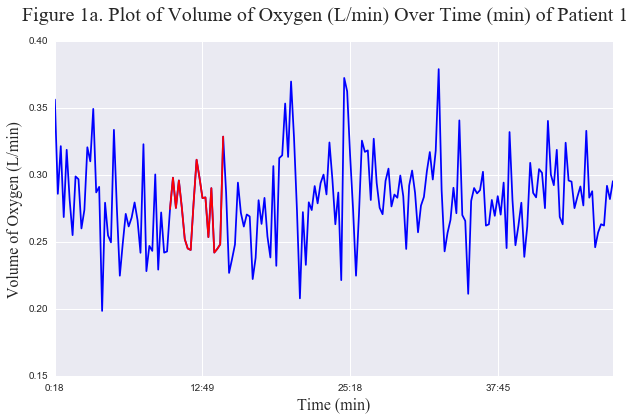

In [13]:
data1 = data[data['Patient ID'] == 1]
data1y = data2[data2['Patient ID'] == 1]
yellow_std.append(data1y['VO2 STPD (L/min)'].std())    
data1merge = pd.merge(data1, data1y, how= 'left', on='Time (min)')
remain_std.append(data1merge.loc[pd.isnull(data1merge['VO2 STPD (L/min)_y']), 'VO2 STPD (L/min)_x'].std())
fig, axes = plt.subplots(figsize=(10, 6))
data1merge.set_index("Time (min)")['VO2 STPD (L/min)_x'].plot(color='b',ax = axes)
data1merge.set_index("Time (min)")['VO2 STPD (L/min)_y'].plot(color='r', ax= axes)
fig.suptitle('Figure 1a. Plot of Volume of Oxygen (L/min) Over Time (min) of Patient 1', fontsize=20, fontweight='bold',fontname="Times New Roman")
plt.xlabel('Time (min)', fontsize=16, fontweight = 'bold', fontname = 'Times New Roman')
plt.ylabel('Volume of Oxygen (L/min)', fontsize=16, fontweight = 'bold', fontname = 'Times New Roman')
fig.savefig('Figure1a.jpg')

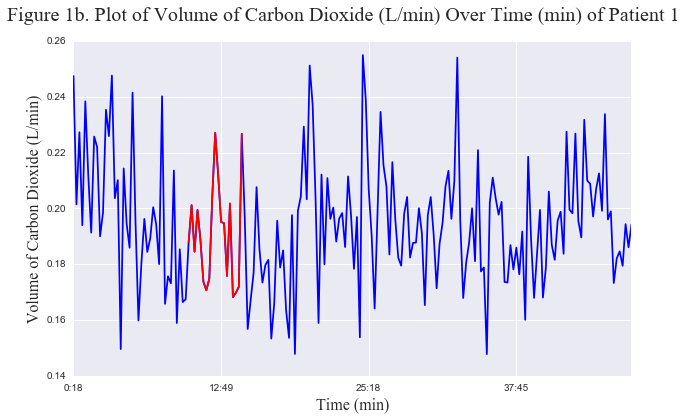

In [14]:
data1 = data[data['Patient ID'] == 1]
data1y = data2[data2['Patient ID'] == 1]
yellow_std.append(data1y['VCO2 STPD (L/min)'].std())    
data1merge = pd.merge(data1, data1y, how= 'left', on='Time (min)')
remain_std.append(data1merge.loc[pd.isnull(data1merge['VCO2 STPD (L/min)_y']), 'VCO2 STPD (L/min)_x'].std())
fig, axes = plt.subplots(figsize=(10, 6))
data1merge.set_index("Time (min)")['VCO2 STPD (L/min)_x'].plot(color='b',ax = axes)
data1merge.set_index("Time (min)")['VCO2 STPD (L/min)_y'].plot(color='r', ax= axes)
fig.suptitle('Figure 1b. Plot of Volume of Carbon Dioxide (L/min) Over Time (min) of Patient 1', fontsize=20, fontweight='bold',fontname="Times New Roman")
plt.xlabel('Time (min)', fontsize=16, fontweight = 'bold', fontname = 'Times New Roman')
plt.ylabel('Volume of Carbon Dioxide (L/min)', fontsize=16, fontweight = 'bold', fontname = 'Times New Roman')
fig.savefig('Figure1b.jpg')

In [35]:
#Figure 2

In [36]:
df_yellow = pd.DataFrame()
df_yellow['Patient ID'] = pids
df_yellow['yellow_std'] = yellow_std
df_remain = pd.DataFrame()
df_remain['Patient ID'] = pids
df_remain['remain_std'] = remain_std
std = pd.DataFrame()
std['yellow_std'] = yellow_std
std['remain_std'] = remain_std

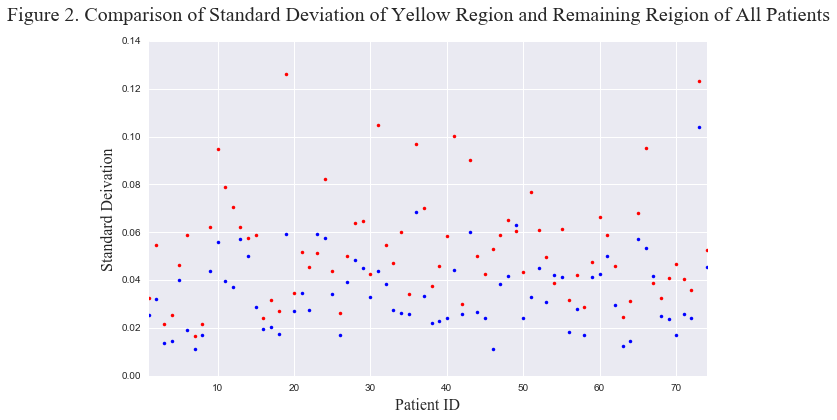

In [51]:
fig, axes = plt.subplots(figsize=(10, 6))
# std.plot(style='.')
out_std.set_index('Patient ID')['yellow_std'].plot(style='.',color='b')
out_std.set_index('Patient ID')['remain_std'].plot(style='.',color='r')
fig.suptitle('Figure 2. Comparison of Standard Deviation of Yellow Region and Remaining Reigion of All Patients', fontsize=20, fontweight='bold',fontname="Times New Roman")
plt.xlabel('Patient ID', fontsize=16, fontweight = 'bold', fontname = 'Times New Roman')
plt.ylabel('Standard Deivation', fontsize=16,  fontweight = 'bold', fontname = 'Times New Roman')
fig.savefig('Figure2.jpg')

In [7]:
%load_ext rpy2.ipython

In [8]:
%%R -i out_std

t.test(out_std$yellow_std,out_std$remain_std , paired=TRUE)


In [20]:
# Figure 3: Distribution of the total test time

In [59]:
data

,Patient ID,Age,Sex,Height (in),Height (cm),Weight (Ib),Weight (kg),Time (min),VO2/kg STPD (ml/kg/m),VO2 STPD (L/min),...,VCO2 STPD (L/min),(ml/min).1,VE STPD (L/min),RQ,RR (BPM),VE/VO2 (BT/ST),METS,TM SPD(mph),Start,End
0,1,46,F,67.000000,170.179993,186.380997,84.718636,0:18,4.205394,0.356275,...,0.247425,247.424841,7.473200,0.694477,12.834225,25.997837,1.201541,0.0,40,58
0,1,46,F,67.000000,170.179993,186.380997,84.718636,0:30,3.374727,0.285902,...,0.201463,201.463372,5.990118,0.704658,10.335917,25.967733,0.964208,0.0,40,58
0,1,46,F,67.000000,170.179993,186.380997,84.718636,0:49,3.794683,0.321480,...,0.227283,227.283075,6.813195,0.706989,9.424084,26.267130,1.084195,0.0,40,58
0,1,46,F,67.000000,170.179993,186.380997,84.718636,1:03,3.169709,0.268533,...,0.193977,193.977356,5.767123,0.722358,8.797654,26.618103,0.905631,0.0,40,58
0,1,46,F,67.000000,170.179993,186.380997,84.718636,1:20,3.762461,0.318751,...,0.238344,238.344163,6.795503,0.747745,6.737788,26.423296,1.074989,0.0,40,58
0,1,46,F,67.000000,170.179993,186.380997,84.718636,1:35,3.324426,0.281641,...,0.211946,211.945727,5.899158,0.752539,8.102633,25.960358,0.949836,0.0,40,58
0,1,46,F,67.000000,170.179993,186.380997,84.718636,1:46,3.010240,0.255023,...,0.191315,191.314548,5.261397,0.750184,10.978957,25.570383,0.860069,0.0,40,58
0,1,46,F,67.000000,170.179993,186.380997,84.718636,2:08,3.527878,0.298877,...,0.225742,225.742131,6.074594,0.755301,8.272058,25.190744,1.007965,0.0,40,58
0,1,46,F,67.000000,170.179993,186.380997,84.718636,2:16,3.503185,0.296785,...,0.222011,222.010523,6.056265,0.748051,7.509387,25.291759,1.000910,0.0,40,58
0,1,46,F,67.000000,170.179993,186.380997,84.718636,2:32,3.069382,0.260034,...,0.189974,189.974263,5.366534,0.730575,7.532957,25.578804,0.876966,0.0,40,58


In [60]:
pids = data['Patient ID'].unique()
subject = data.groupby('Patient ID')
from datetime import datetime, timedelta
deltatime = []
starttime = []
endtime =[]
for pid in pids:
    start_time = datetime.strptime(subject.get_group(pid)['Time (min)'].values[0],"%M:%S")
    delta_start = timedelta(minutes=start_time.minute, seconds=start_time.second)
    end_time = datetime.strptime(subject.get_group(pid)['Time (min)'].values[-1],"%M:%S")
    delta_end = timedelta(minutes=end_time.minute, seconds=end_time.second)
    starttime.append((delta_start).seconds)
    endtime.append((delta_end).seconds)
    deltatime.append((delta_end-delta_start).seconds)

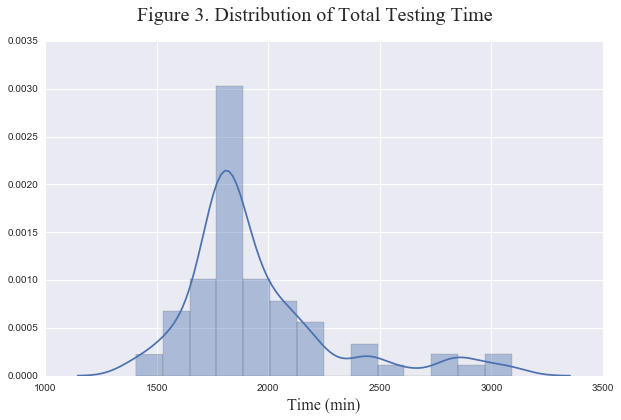

In [61]:
fig, axes = plt.subplots(figsize=(10, 6))
sns.distplot(deltatime);
fig.suptitle('Figure 3. Distribution of Total Testing Time', fontsize=20, fontweight='bold',fontname="Times New Roman")
plt.xlabel('Time (min)', fontsize=16, fontweight = 'bold', fontname = 'Times New Roman')
#plt.ylabel('', fontsize=16,  fontweight = 'bold', fontname = 'Times New Roman')
fig.savefig('Figure3.jpg')

(array([  5.,   8.,  34.,  11.,   7.,   0.,   3.,   1.,   3.,   2.]),
 array([ 1407. ,  1575.4,  1743.8,  1912.2,  2080.6,  2249. ,  2417.4,
         2585.8,  2754.2,  2922.6,  3091. ]),
 <a list of 10 Patch objects>)

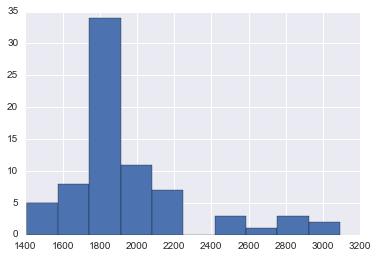

In [41]:
plt.hist(deltatime)

In [ ]:
# Figure 4: Distribution of difference in standard deviation of yellow region and remaining region

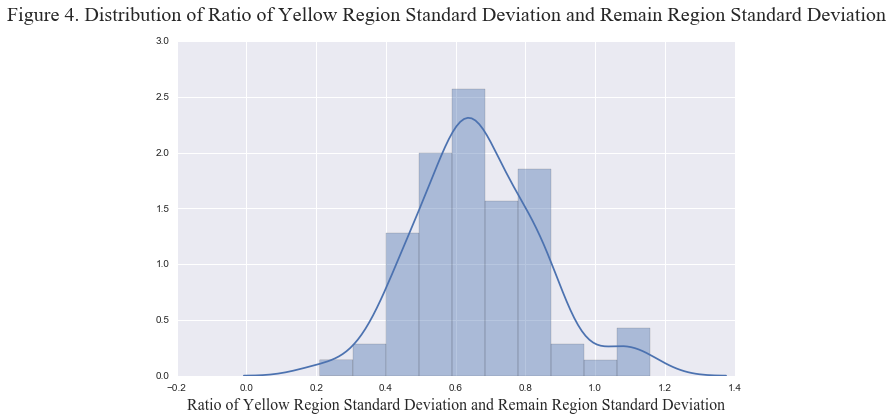

In [53]:
fig, axes = plt.subplots(figsize=(10, 6))
sns.distplot(std_ratio);
fig.suptitle('Figure 4. Distribution of Ratio of Yellow Region Standard Deviation and Remain Region Standard Deviation', fontsize=20, fontweight='bold',fontname="Times New Roman")
plt.xlabel('Ratio of Yellow Region Standard Deviation and Remain Region Standard Deviation', fontsize=16, fontweight = 'bold', fontname = 'Times New Roman')
#plt.ylabel('', fontsize=16,  fontweight = 'bold', fontname = 'Times New Roman')
fig.savefig('Figure4.jpg')

In [54]:
# pids = data2['Patient ID'].unique()
# subject = data2.groupby('Patient ID')
# from datetime import datetime, timedelta
# deltatime = []
# starttime = []
# endtime =[]
# for pid in pids:
#     start_time = datetime.strptime(subject.get_group(pid)['Time (min)'].values[0],"%M:%S")
#     delta_start = timedelta(minutes=start_time.minute, seconds=start_time.second)
#     end_time = datetime.strptime(subject.get_group(pid)['Time (min)'].values[-1],"%M:%S")
#     delta_end = timedelta(minutes=end_time.minute, seconds=end_time.second)
#     starttime.append((delta_start).seconds)
#     endtime.append((delta_end).seconds)
#     deltatime.append((delta_end-delta_start).seconds)

In [55]:
# fig, axes = plt.subplots(figsize=(10, 6))
# sns.distplot(starttime);
# fig.suptitle('Figure 4. Distribution of Start Time of Yellow Region', fontsize=20, fontweight='bold',fontname="Times New Roman")
# plt.xlabel('Time (min)', fontsize=16, fontweight = 'bold', fontname = 'Times New Roman')
# #plt.ylabel('', fontsize=16,  fontweight = 'bold', fontname = 'Times New Roman')
# fig.savefig('Figure4.jpg')

In [65]:
# Figure 5: Distribution of the length of yellow region

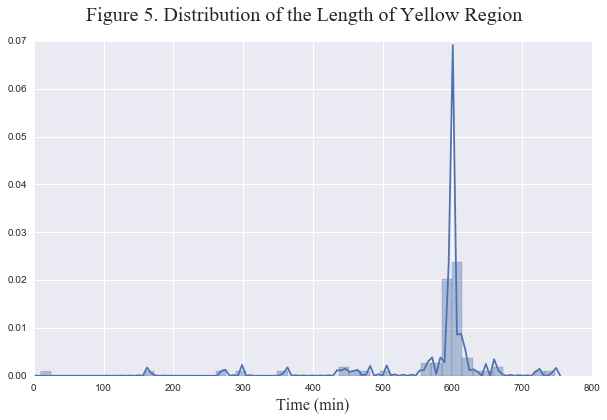

In [66]:
fig, axes = plt.subplots(figsize=(10, 6))
sns.distplot(deltatime);
fig.suptitle('Figure 5. Distribution of the Length of Yellow Region', fontsize=20, fontweight='bold',fontname="Times New Roman")
plt.xlabel('Time (min)', fontsize=16, fontweight = 'bold', fontname = 'Times New Roman')
#plt.ylabel('', fontsize=16,  fontweight = 'bold', fontname = 'Times New Roman')
fig.savefig('Figure5.jpg')

In [ ]:
# Conclusion: from Figure 2 to 4, decide what the optimal start time and length of the yellow region by maximum likehood 

In [ ]:
# Start  = 5 min
# Length = 10 min

In [ ]:
# Implement the Python GUI software which will take the raw testing data file and calcuate the RMR

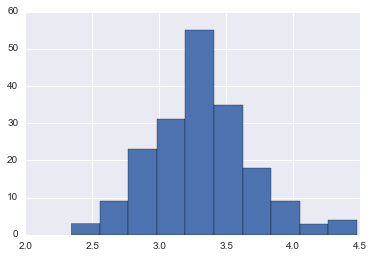

In [8]:
data[data['Patient ID'] == 1]['VO2/kg STPD (ml/kg/m)'].hist()

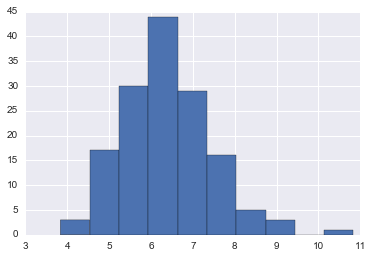

In [9]:
data[data['Patient ID'] == 2]['VO2/kg STPD (ml/kg/m)'].hist()

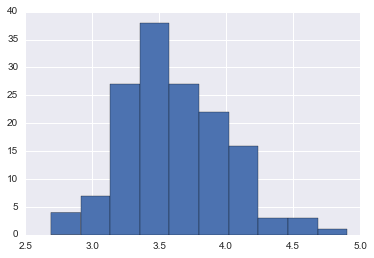

In [10]:
data[data['Patient ID'] == 3]['VO2/kg STPD (ml/kg/m)'].hist()

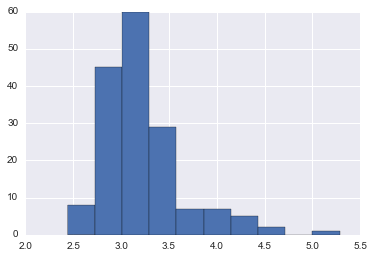

In [11]:
data[data['Patient ID'] == 4]['VO2/kg STPD (ml/kg/m)'].hist()

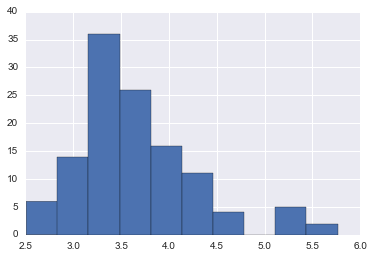

In [12]:
data[data['Patient ID'] == 5]['VO2/kg STPD (ml/kg/m)'].hist()

In [1]:
a = 90/7
a

12.857142857142858

In [2]:
a = 26%7
a

5

In [5]:
seconds= 137
minutes, seconds= divmod(seconds, 60)
minutes


2

In [ ]:
http://matplotlib.org/users/pyplot_tutorial.html